Лабораторная работа 5

Тема: Классификация с помощью нейронных сетей

Вариант 3 (beauty).

Задание.
Построить двухслойную нейронную сеть для классификации на два класса. Разбивку на классы сделать  по столбцу "правильных ответов". Если этот столбец непонятно как определить (можно спросить о нем у преподавателя), то использовать  разбиение на 2 кластера в задании 2 или 3. Классификацию проводить по всем признакам, а для визуализации использовать два наиболее значимых или главные компоненты из 3. (Вариант архитектуры сети - оба слоя полносвязных, первый слой с функцией активации Релу, а второй слой софтмакс или сигмоидная функция активации. Качество можно отслеживать с помощью точности, эпох должно быть не меньше 10; по поводу использования библиотек: предпочтительно написать не используя специальных библиотек для разработки нейронных сетей; если использовать всё-таки библиотеки, то лучше использовать тензорфло и керас в колабе; другие варианты - например, пайторч, тоже допустимы, но тогда обязательно оформление отчета).


Epoch 0: Loss = 0.8732
Epoch 50: Loss = 0.5502
Epoch 100: Loss = 0.5177
Epoch 150: Loss = 0.5008
Epoch 200: Loss = 0.4902
Epoch 250: Loss = 0.4826
Test Accuracy: 0.7634920634920634


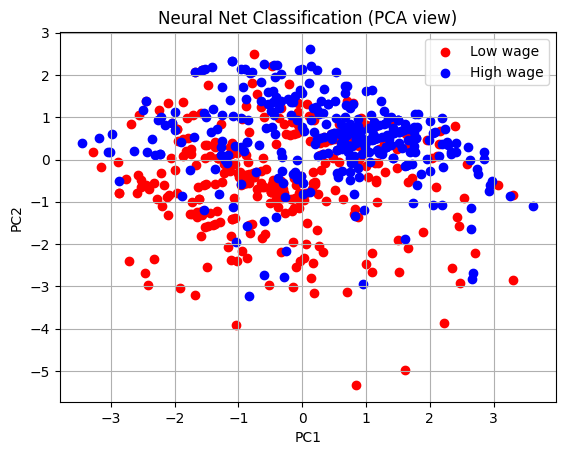

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Активации и их производные
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def neural_net_beauty(epochs=300, lr=0.1, hidden_size=20):
    # Загрузка и подготовка данных
    df = pd.read_csv('beauty.csv')
    median_wage = df['wage'].median()
    df['wage_cat'] = (df['wage'] > median_wage).astype(int)

    features = ['exper', 'union', 'goodhlth', 'black', 'female', 'married', 'service', 'educ', 'looks']
    target = 'wage_cat'

    train = df[::2].copy()
    test = df[1::2].copy()

    scaler = StandardScaler()
    X_train = scaler.fit_transform(train[features])
    X_test = scaler.transform(test[features])
    y_train = train[target].values.reshape(-1, 1)
    y_test = test[target].values.reshape(-1, 1)

    n_features = X_train.shape[1]

    # Инициализация весов (He initialization)
    W1 = np.random.randn(n_features, hidden_size) * np.sqrt(2. / n_features)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, hidden_size))
    W3 = np.random.randn(hidden_size, 1) * np.sqrt(2. / hidden_size)
    b3 = np.zeros((1, 1))

    for epoch in range(epochs):
        # Forward pass
        Z1 = X_train.dot(W1) + b1
        A1 = relu(Z1)
        Z2 = A1.dot(W2) + b2
        A2 = relu(Z2)
        Z3 = A2.dot(W3) + b3
        A3 = sigmoid(Z3)

        # Потери
        loss = -np.mean(y_train * np.log(A3 + 1e-8) + (1 - y_train) * np.log(1 - A3 + 1e-8))

        # Backward pass
        dZ3 = A3 - y_train
        dW3 = A2.T.dot(dZ3) / len(y_train)
        db3 = np.mean(dZ3, axis=0, keepdims=True)

        dA2 = dZ3.dot(W3.T)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = A1.T.dot(dZ2) / len(y_train)
        db2 = np.mean(dZ2, axis=0, keepdims=True)

        dA1 = dZ2.dot(W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = X_train.T.dot(dZ1) / len(y_train)
        db1 = np.mean(dZ1, axis=0, keepdims=True)

        # Обновление весов
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    # Предсказания
    def predict(X):
        A1 = relu(X.dot(W1) + b1)
        A2 = relu(A1.dot(W2) + b2)
        A3 = sigmoid(A2.dot(W3) + b3)
        return (A3 > 0.5).astype(int)

    y_pred = predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print("Test Accuracy:", accuracy)

    # Визуализация
    pca = PCA(n_components=2)
    X_vis = pca.fit_transform(X_test)
    plt.scatter(X_vis[y_test[:, 0] == 0][:, 0], X_vis[y_test[:, 0] == 0][:, 1], color='red', label='Low wage')
    plt.scatter(X_vis[y_test[:, 0] == 1][:, 0], X_vis[y_test[:, 0] == 1][:, 1], color='blue', label='High wage')
    plt.title("Neural Net Classification (PCA view)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid(True)
    plt.show()

neural_net_beauty()


Вывод: Loss уверенно убывает с 0.87 до 0.48. Точность на тест 76.3%, что существенно выше случайной 50%. PCA-график показывает, что модель научилась разделять классы. Видно кластеры красных и синих точек. Увеличение числа нейронов, добавление второго скрытого слоя и правильная инициализация весов показали хорошее обучение. Нейросеть успешно классифицирует данные по зарплате, и график подтверждает, что граница между классами научилась формироваться.